# Circle Example

In [ ]:
import earthkit.data

request = {
    "class": "od",
    "stream" : "enfo",
    "type" : "pf",
    "date" : -1,  # Note: date must be within the last two days
    "time" : "1200",
    "levtype" : "sfc",
    "expver" : "0001",
    "domain" : "g",
    "param" : "167/169",
    "number" : "1",
    "step": "0",
    "feature": {
        "type": "circle",
        "center": [[0, 50.78]],
        "axes": ["latitude", "longitude"],
        "radius": 1,
    },
}

ds = earthkit.data.from_source("polytope", "ecmwf-mars", request, stream=False, address='polytope.ecmwf.int')

## Convert to xarray

In [33]:
da = ds.to_xarray()
da

<xarray.Dataset> Size: 31kB
Dimensions:    (datetimes: 1, number: 1, steps: 1, points: 652)
Coordinates:
  * datetimes  (datetimes) <U20 80B '2025-12-01T12:00:00Z'
  * number     (number) int64 8B 1
  * steps      (steps) int64 8B 0
  * points     (points) int64 5kB 0 1 2 3 4 5 6 ... 645 646 647 648 649 650 651
    latitude   (points) float64 5kB -1.019 -1.019 -0.949 ... 0.949 1.019 1.019
    longitude  (points) float64 5kB 50.74 50.81 50.49 ... 51.05 50.74 50.81
    levelist   (points) float64 5kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Data variables:
    2t         (datetimes, number, steps, points) float64 5kB 300.7 ... 300.3
    ssrd       (datetimes, number, steps, points) float64 5kB 0.0 0.0 ... 0.0
Attributes:
    class:          od
    Forecast date:  2025-12-01T12:00:00Z
    domain:         g
    expver:         0001
    levtype:        sfc
    number:         1
    step:           0
    stream:         enfo
    type:           pf
    date:           2025-12-01T12:00:00Z

## Visualise data

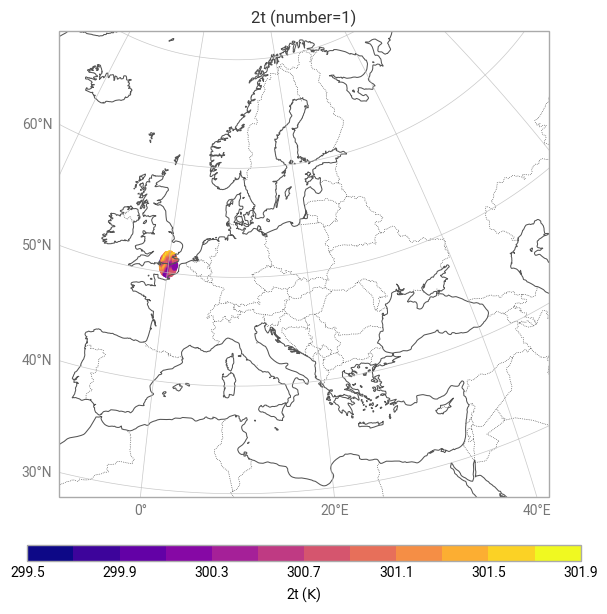

In [34]:
da = ds.to_xarray()
import earthkit.plots
chart = earthkit.plots.Map(domain="Europe")
chart.point_cloud(da['2t'], x="latitude", y="longitude")

chart.coastlines()
chart.borders()
chart.gridlines()

chart.title("{variable_name} (number={number})")

chart.legend()

chart.show()